In [1]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt
from random import gauss

# Finding R

In [2]:
# def R(L):
#     base = np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
#     R = base
#     for i in range(L-2):
#         R = np.kron(R,np.eye(2))
#     for i in range(L-3):
#         R += np.kron(np.eye(2),np.kron(np.eye(2),base))
#     return R

In [2]:
def get_R(L, parity = False):
    R = np.zeros((2**L,2**L))
    for n in range(2**L):
        reverse = int(('{:0'+str(L)+'b}').format(n)[::-1], 2)
        R[n, reverse] = 1
    if parity:
        R = R@hm.get_Px(L)
    return R

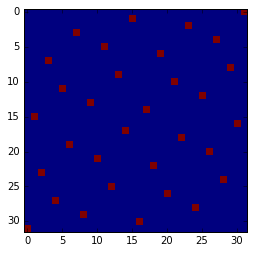

In [3]:
L=5
parity=True
plt.imshow(get_R(L, parity=parity), interpolation='nearest')
plt.show()

In [5]:
H=hm.dense_H(L)
R = get_R(L, parity=parity)
# R = hm.get_Px(L)
np.all(np.isclose(R@H@R+H,0))

True

In [6]:
for L in range(3,15):
    print("L =", L, ", trace =", np.trace(get_R(L, parity=parity)))

L = 3 , trace = 0.0
L = 4 , trace = 4.0
L = 5 , trace = 0.0
L = 6 , trace = 8.0
L = 7 , trace = 0.0
L = 8 , trace = 16.0
L = 9 , trace = 0.0
L = 10 , trace = 32.0
L = 11 , trace = 0.0


KeyboardInterrupt: 

# Breaking SU(2)

In [143]:
def rand_vector():
    vec = [gauss(0, 1) for i in range(3)]
    mag = sum(x**2 for x in vec) ** .5
    return [x/mag for x in vec]

def SU2breaker(L):
    H = np.zeros((2**L,2**L), dtype=complex)
    for j in range(L//2):
        hs = []
        for i in range(L):
            hs.append(np.eye(2,2, dtype=complex))
        vect = rand_vector()
        h = vect[0]*hm.X + vect[1]*hm.Y + vect[2]*hm.Z
        hs[j] = h
        H += hm.tensor(*hs)
        hs[j] = np.eye(2,2, dtype=complex)
        hs[L-j-1] = np.zeros((2,2), dtype=complex) - h
        H += hm.tensor(*hs)
    return H

In [144]:
L = 4
Hprime = hm.dense_H(L) + .001*SU2breaker(L)
R = get_R(L)
np.all(np.isclose(R@Hprime@R+Hprime,0))

True

In [146]:
for L in range(3,12):
    H  = hm.dense_H(L) + .001*SU2breaker(L)
    valsH, vecsH = la.eigh(H)
    print(L, np.sum(np.isclose(valsH,0)))

3 4
4 4
5 8
6 8
7 16
8 16
9 32
10 32
11 64


In [125]:
print(list1)

[array([[ 0.,  0.],
       [ 0.,  0.]])]


In [134]:
L = 3
print(hm.chop(SU2breaker(L)))


chop() removed the imaginary part
 
[[ 0.     0.325  0.     0.    -0.325  0.     0.     0.   ]
 [ 0.325  0.814  0.     0.     0.    -0.325  0.     0.   ]
 [ 0.     0.     0.     0.325  0.     0.    -0.325  0.   ]
 [ 0.     0.     0.325  0.814  0.     0.     0.    -0.325]
 [-0.325  0.     0.     0.    -0.814  0.325  0.     0.   ]
 [ 0.    -0.325  0.     0.     0.325  0.     0.     0.   ]
 [ 0.     0.    -0.325  0.     0.     0.    -0.814  0.325]
 [ 0.     0.     0.    -0.325  0.     0.     0.325  0.   ]]


In [8]:
hm.get_Px(2)

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

In [121]:
np.eye(2,2)

array([[ 1.,  0.],
       [ 0.,  1.]])